In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

random_seed = 42

matplotlib.rcParams.update({'font.size': 16})

Create something that looks like this 
$$
    y = w_1\cdot x_1 + w_2\cdot x_2 + b
$$

Gradient descent:
1. Using the gradient descent, the weights vector $$w^{i+1} = w^i - \eta_t \cdot \bigtriangledown_w Q(w^i)$$

In [137]:
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 100

np.random.seed(45)


# weights 
w_true = np.random.normal(size=(n_features)) # True values of weight array 

X = np.random.uniform(-5, 5, (n_objects, n_features))

X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :] # For what is this?

# This is true target array
noise = np.random.normal(0, 1, n_objects)
Y = X.dot(w_true) + noise


In [138]:
w_true.shape, X.shape, X.T.shape, Y.shape

((2,), (300, 2), (2, 300), (300,))

What if we scale our X data

In [148]:
X_new = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-4)
X = X_new

In [149]:
w_0 = np.random.uniform(-2, 2, n_features) - 0.5
w = w_0.copy()
w_list = [w.copy()]
step_size = 1e-2

# print(w_0.shape, w.shape)

for i in range(num_steps):
    w -= step_size * 2.0 * np.dot(X.T, np.dot(X,w) - Y) / Y.size
    w_list.append(w.copy())
    
w_list = np.array(w_list)

# print(len(w_list))


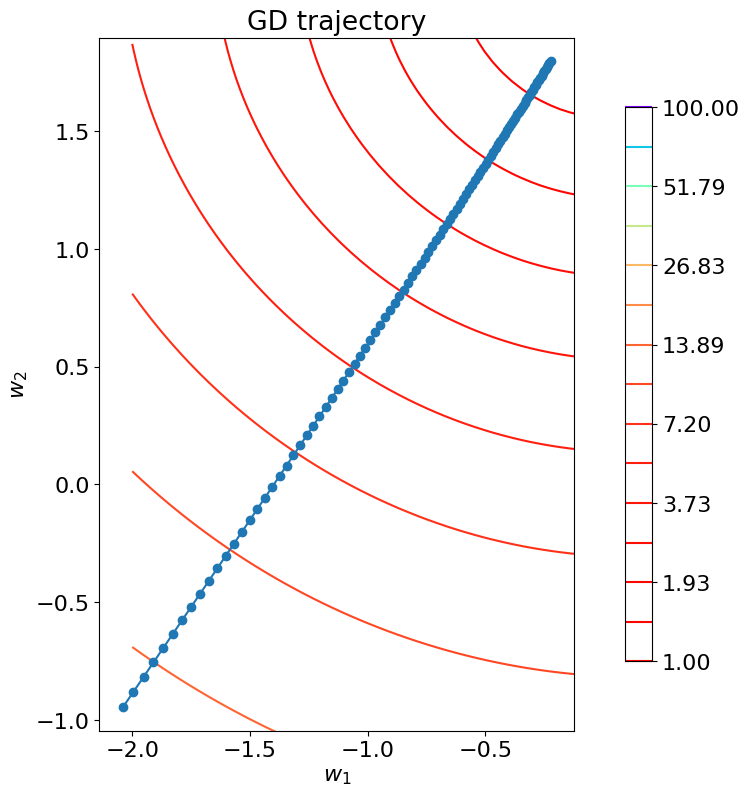

In [150]:
# Create a surface mesh
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean((Y - np.dot(X, w_tmp))**2)

plt.figure(figsize=(13, 9))
plt.title('GD trajectory')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
plt.gca().set_aspect('equal')

#visualise the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=15), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(w_true[0], w_true[1], c='r')
# plt.scatter(w_list[:, 0], w_list[:, 1])
plt.plot(w_list[:, 0], w_list[:, 1], marker='o')

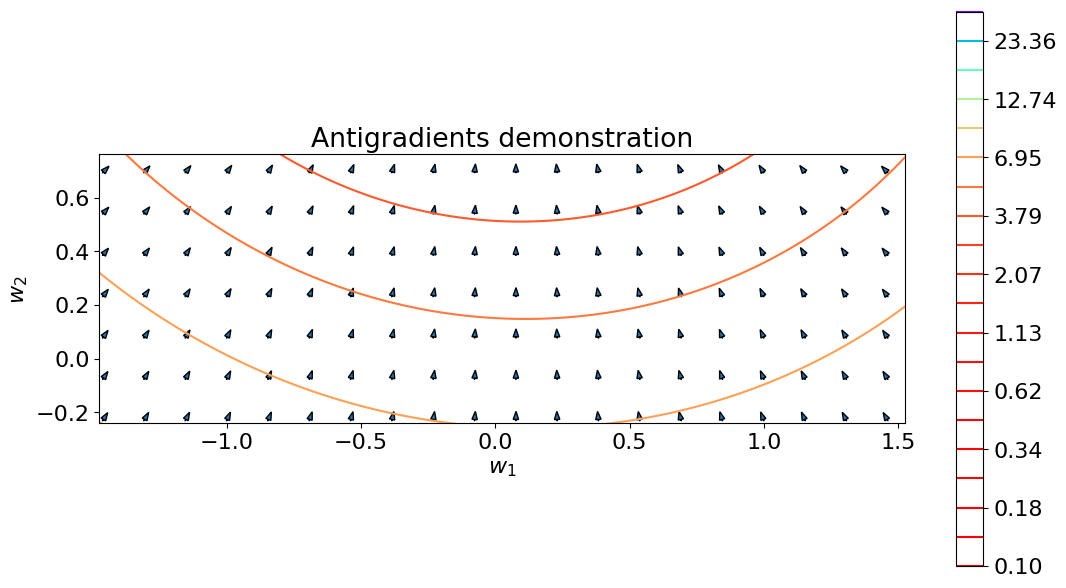

In [151]:
# Create a surface mesh
A, B = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))
A_mini, B_mini = np.meshgrid(np.linspace(-3, 3, 40), np.linspace(-3, 3, 40))

levels = np.empty_like(A)

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        w_tmp = np.array([A[i, j], B[i, j]])
        levels[i, j] = np.mean((Y - np.dot(X, w_tmp))**2)

plt.figure(figsize=(13, 9))

#visualise the level set
CS = plt.contour(A, B, levels, levels=np.logspace(-1, 1.5, num=20), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

gradients = np.empty_like(A_mini)
for i in range(A_mini.shape[0]):
    for j in range(A_mini.shape[1]):
        w_tmp = np.array([A_mini[i, j], B_mini[i, j]])
        antigrad = -2 * 1e-3 * np.dot(X.T, np.dot(X, w_tmp) - Y) / Y.shape[0]
        plt.arrow(A_mini[i, j], B_mini[i, j], antigrad[0], antigrad[1], head_width=0.02)

plt.title('Antigradients demonstration')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_true[0] - 1.5, w_true[0] + 1.5))
plt.ylim((w_true[1] - .5, w_true[1] + .5))
plt.gca().set_aspect('equal')
plt.show()


In [152]:
batch_size = 150
w = w_0.copy()
w_history_list = [w.copy()]
lr = 1e-2

In [153]:
for i in range(num_steps):
    sample_indices = np.random.randint(0, n_objects, batch_size)
    X_batch = X[sample_indices, :]
    Y_batch = Y[sample_indices]
    w -= step_size * 2.0 * np.dot(X_batch.T, np.dot(X_batch, w) - Y_batch) / Y_batch.size
    w_history_list.append(w.copy())
w_history_list = np.array(w_history_list)

In [154]:
A, B = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

levels = np.empty_like(A)

for i in range(levels.shape[0]):
    for j in range(levels.shape[1]):
        w_tmp = [A[i, j], B[i, j]]
        levels[i, j] = np.mean((np.dot(X, w_tmp) - Y)**2)

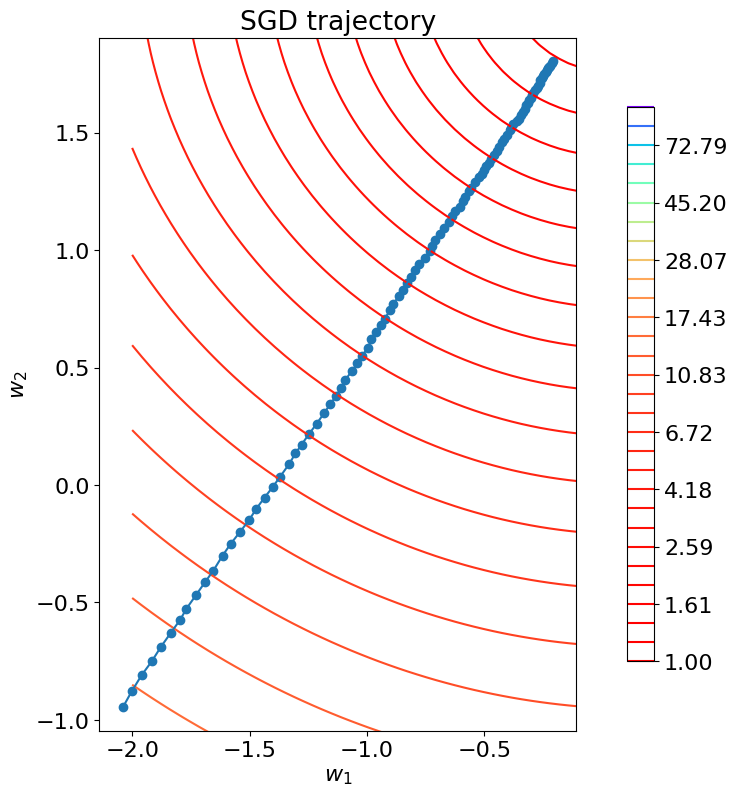

In [155]:
plt.figure(figsize=(13, 9))
plt.title('SGD trajectory')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.xlim((w_history_list[:, 0].min() - 0.1, w_history_list[:, 0].max() + 0.1))
plt.ylim((w_history_list[:, 1].min() - 0.1, w_history_list[:, 1].max() + 0.1))
plt.gca().set_aspect('equal')

# visualize the level set
CS = plt.contour(A, B, levels, levels=np.logspace(0, 2, num=30), cmap=plt.cm.rainbow_r)
CB = plt.colorbar(CS, shrink=0.8, extend='both')

# visualize trajectory
plt.scatter(w_true[0], w_true[1], c='r')
plt.scatter(w_history_list[:, 0], w_history_list[:, 1])
plt.plot(w_history_list[:, 0], w_history_list[:, 1])

plt.show()

In [156]:
X[:10, :].mean(axis=0, keepdims=True).shape

(1, 2)

Comparing the convergence speed

In [160]:
n_features = 50
n_objects = 1000
num_steps = 500
batch_size = 10

w_true = np.random.uniform(-2, 2, n_features)
X = np.random.uniform(-10, 10, (n_objects, n_features))
noise = np.random.normal(0, 5, n_objects)
Y = X.dot(w_true) + noise

In [167]:
lr_sgd = 1e-3
lr_gd = 1e-3
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd = w_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]

for i in range(num_steps):
    lr = lr_sgd / ((i+1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    w_sgd -= 2 * lr * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample]) / batch_size
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))
    
    w_gd -= 2 * lr_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))

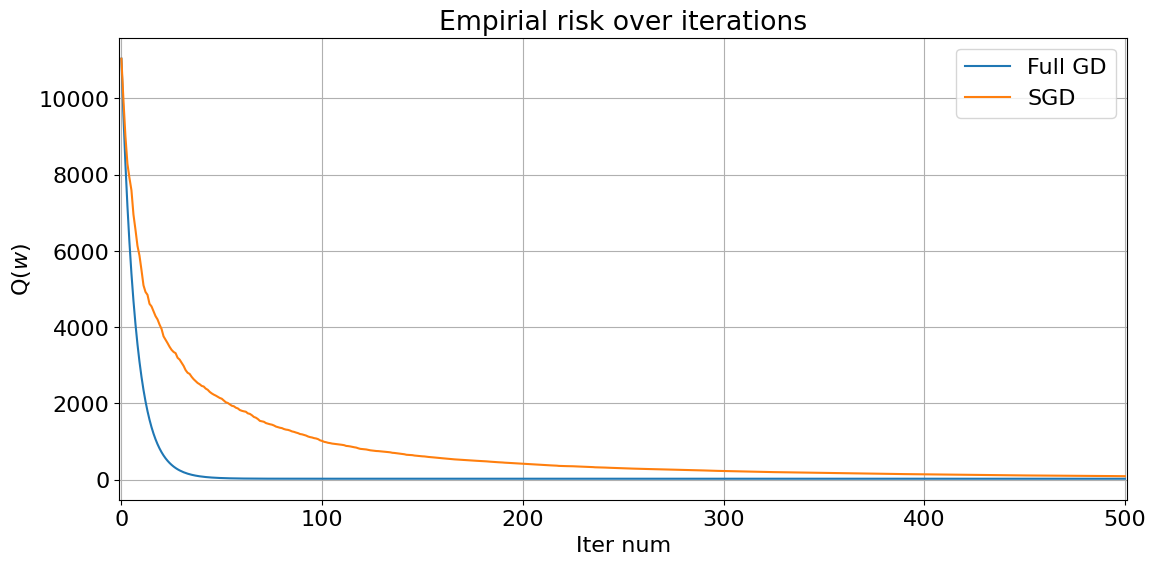

In [168]:
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps+1), residuals_gd, label='Full GD')
plt.plot(range(num_steps+1), residuals_sgd, label='SGD')
plt.title('Empirial risk over iterations')
plt.xlim((-1, num_steps+1))
# plt.xlim((200, num_steps+1))
plt.legend()
plt.xlabel('Iter num')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (2501,) and (501,)

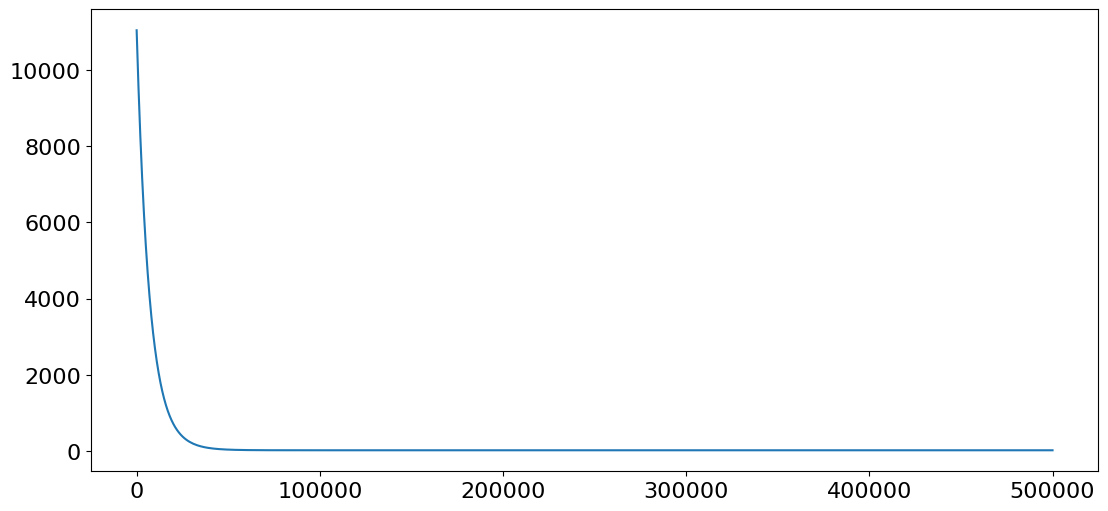

In [169]:
plt.figure(figsize=(13, 6))
plt.plot(np.arange(num_steps+1)*n_objects, residuals_gd, label='Full GD')
plt.plot(np.arange(num_steps*5+1)*batch_size, residuals_sgd, label='SGD')
plt.title('Empirial risk over objects')
plt.xlim((-1, (num_steps+1)*n_objects/5))
plt.legend()
plt.xlabel('Number of seen objects (non-unique)')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

In [187]:
# data generation
n_features = 50
n_objects = 1000
num_steps = 500
batch_size = 10
w_true = np.random.uniform(-2, 2, n_features)
X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)

lr_sgd = 1e-3
lr_gd = 1e-3
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd - w_sgd.copy()
residuals_sgd = [np.mean(np.power(np.dot(X, w_sgd) - Y, 2))]
residuals_gd = [np.mean(np.power(np.dot(X, w_gd) - Y, 2))]

for i in range(num_steps*5):
    lr = lr_sgd / ((i+1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)
    w_sgd -= 2 * lr * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample]) / batch_size
    residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))

    w_gd -= 2 * lr_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(np.mean(np.power(np.dot(X, w_gd) - Y, 2)))

# for i in range(num_steps*5):
#     lr = lr_sgd / ((i+1) ** 0.51)
#     sample = np.random.randint(n_objects, size=batch_size)
#     w_sgd -= 2 * lr * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample]) / batch_size
# residuals_sgd.append(np.mean(np.power(np.dot(X, w_sgd) - Y, 2)))

<function matplotlib.pyplot.show(close=None, block=None)>

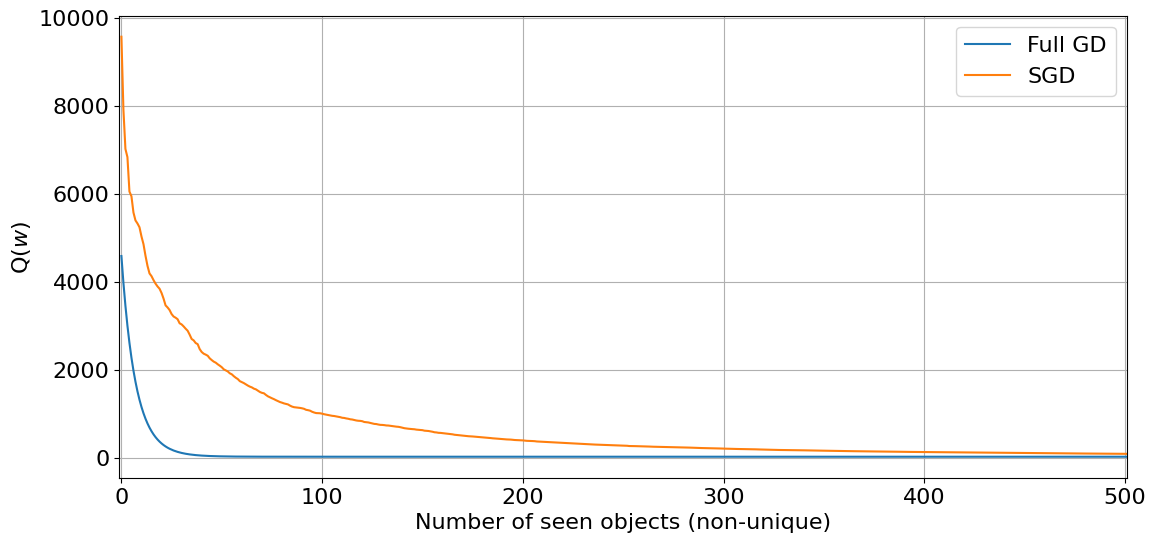

In [188]:
plt.figure(figsize=(13, 6))
# plt.plot(np.arange(num_steps+1), residuals_gd, label='Full GD')
# plt.plot(np.arange(num_steps*5+1), residuals_sgd, label='SGD')
plt.plot(np.arange(num_steps*5+1), residuals_gd, label='Full GD')
plt.plot(np.arange(num_steps*5+1), residuals_sgd, label='SGD')
plt.xlim((-1, (num_steps+1)))
plt.legend()
plt.xlabel('Number of seen objects (non-unique)')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show


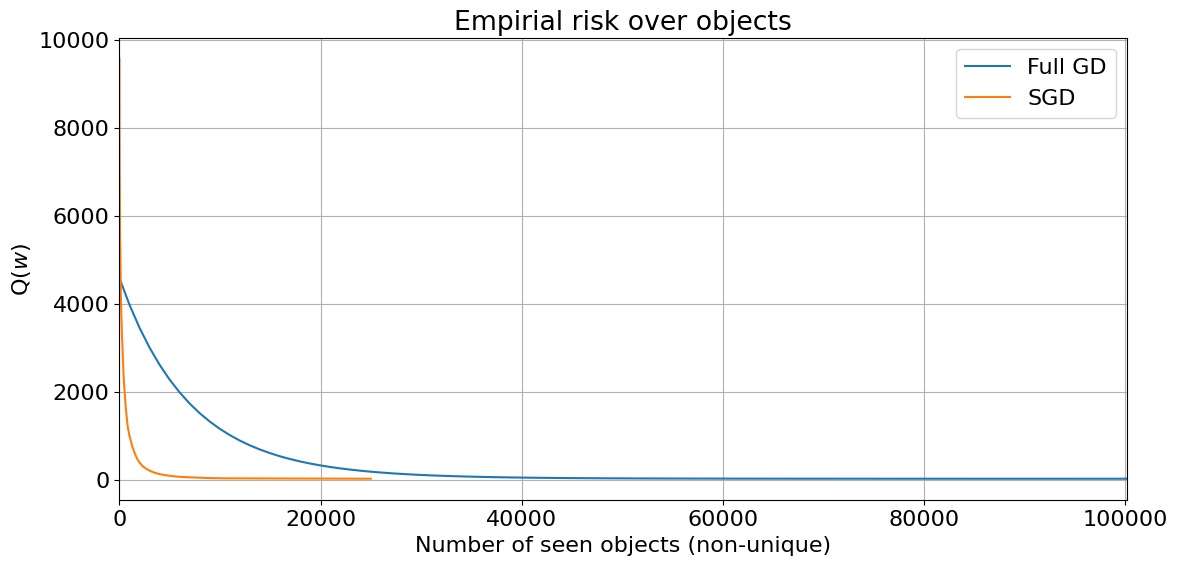

In [189]:
plt.figure(figsize=(13, 6))
plt.plot(np.arange(num_steps*5+1)*n_objects, residuals_gd, label='Full GD')
plt.plot(np.arange(num_steps*5+1)*batch_size, residuals_sgd, label='SGD')
plt.title('Empirial risk over objects')
plt.xlim((-1, (num_steps+1)*n_objects/5))
plt.legend()
plt.xlabel('Number of seen objects (non-unique)')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()
